## Title: Python Codes for Finding the Mercury Perihelion Precession


**Code Developers: Jayashree Kundu, Tamal Sarkar, and Rakesh Kumar Mandal, University of North Bengal**

Reference: Nonrelativistic contribution to Mercury’s perihelion precession (1978) by Michael P. Price; William F. Rush

Publication: https://www.iipseries.org/viewpaper.php?pid=4055&pt=studying-the-planetary-motion-using-python by Jayashree Kundu, Tamal Sarkar and Rakesh Kumar Mandal , University of North Bengal


How to run the code?

Steps:

Step 1:  This is optional if you use (Google Colab) Connect the Google engine and upload the Data File (Planetary_Data.xlsx and Dwarf_Data.xlsx, where Data is stored).

Step2:   Importing required libraries.

Step 3:  Create a folder to save our results (Excel sheet, Figures in JPG format, and Results in Text format).

Step 4:  Calculation of mass of the Sun using Dwarf Planet's Data.

Step 5:  Graphical Representation of the Tabular Data in Step 4 for each Dwarf planet

Step 6:  Calculation of the Perturbing Forces and Non-Relativistic Precession due to the Other Planets.

Step 7:  Calculation of the Relativistic Precession(GR Effects)

Step 8:  Visualization of derived results.

Step 9:  Lastly, we are creating one Text file(for Writing the results of Sun's Mass ,Non-Relativistic Precession due to the Other Planets and the Relativistic Precession(i.e.,GR Effects)),one Excel file(containing planetary details and the force precession) under the previously created folder **Mercury_precession_results** in the file section.


**N.B.** Please press **Refresh** button, in case, if the resulting outputs are not showing in the **Files** section.



# **For using Google Colab(Optional)** #

In [19]:
#from google.colab import files
#uploaded=files.upload()
#Note: Upload the two files 'Dwarf_Data.xlsx' and 'Planetary_Data.xlsx'

# **Importing the required libraries**

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.constants import G as G
from astropy.constants import c as c

# **Creating a folder to save the visualizations(i.e., outputs)**

In [2]:
folder_name = 'Mercury_precession_results'             # directory name
os.makedirs(folder_name, exist_ok=True)        # Create directory if not exisiting
base_dir = f'{folder_name}/'          # Store the path of this directory as base_dir to use it further

# **Calculating the Mass of the Sun from Dwarf's Data**

In [47]:
df1=pd.read_excel('Dwarf_Data.xlsx')

display(df1)   #Source Data

#Creating Numpy array of Orbital radius from Dataframe.
a_o_r_dwarf=np.array(df1['Mean_distance(from Sun)(in AU)'])

#Creating Numpy array of Time period from Dataframe.
a_t_p_dwarf=np.array(df1['Orbital_period(in Earth years)'])
length_d=len(a_o_r_dwarf)
Sun_mass_list_dwarf=list()

for i in range(length_d):
    Sun_mass_dwarf=(4*(np.pi**2)*((a_o_r_dwarf[i]*149.6*(10**9))**3))/(G.value*((a_t_p_dwarf[i]*365*24*60*60)**2))
    Sun_mass_list_dwarf.append(Sun_mass_dwarf)
df1['Sun_mass']=Sun_mass_list_dwarf # Modifiing Dwarf's data.
Median_Sun_mass=np.median(Sun_mass_list_dwarf)
print(f"\nThe Mass of Sun(calculated) is {Median_Sun_mass:.4e} Kg")

,Sl_no.,Dwarf_name,Mean_distance(from Sun)(in AU),Orbital_period(in Earth years)
0,1,Ceres,2.770,4.600
1,2,Orcus,39.174,245.194
2,3,Pluto,39.482,247.940
3,4,Haumea,43.116,283.120
4,5,Quaoar,43.694,288.830
5,6,Makemake,45.430,306.210
6,7,Gonggong,67.483,554.370
7,8,Eris,67.864,559.070
8,9,Sedna,506.000,11390.000



The Mass of Sun(calculated) is 1.9912e+30 Kg


# **Graphical representation of Tabular Data.** #

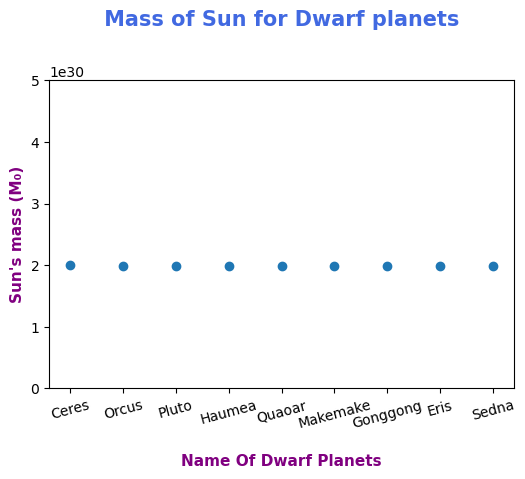

In [48]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.title(' Mass of Sun for Dwarf planets \n\n', color='royalblue',fontsize=15,weight='bold')
plt.xlabel("\nName Of Dwarf Planets",color='purple', fontsize=11,weight='bold')
plt.ylabel("Sun's mass (M\u2080)",color='purple', fontsize=11,weight='bold')
plt.scatter(df1.Dwarf_name,Sun_mass_list_dwarf)
plt.xticks(rotation=15)
plt.ylim([0.0,5e30])
plt.savefig(base_dir+'SunMass.jpg')
plt.show()

# **Calculating the perturbing forces on Mercury** #

In [49]:
    df2=pd.read_excel("Planetary_Data.xlsx")
    display(df2)
    mass_sun=Median_Sun_mass
    a_pl_mass=np.array(df2['Planet_mass(in 10^24 Kg)'])
    a_o_r=np.array(df2['Orbital_radius(in 10^6 Km)'])
    mass_mercury=a_pl_mass[0]*(10**24)
    radius_mercury=a_o_r[0]*(10**9)
    o_t_p_mercury=df2.loc[0,'Time_period(in Earth days)']
    length=len(a_pl_mass)
    force_a1_each=0
    force_a1_list1=list()
    force_a1_sum=0
    force_a1_sum_derivative=0
    force_a1=0
    lamda_list=['...',]
    lamda_i_a_r2_a2_list=['...',]
    S_a_list=['...']
    force_a1_list=['...']
    for i in range(1,length):
        lamda_i=(a_pl_mass[i]*(10**24))/(2*np.pi*a_o_r[i]*(10**9))
        r2_a2=((a_o_r[i]*(10**9))**2)-(radius_mercury**2)
        lamda_i_a_r2_a2=(lamda_i*radius_mercury)/(r2_a2)
        force_a1_each=G.value*np.pi*mass_mercury*lamda_i_a_r2_a2 #λ_i  a/((R_i^2- a^2 ) )
        force_a1_sum=force_a1_sum+lamda_i_a_r2_a2
        force_a1_sum_derivative=force_a1_sum_derivative+\
                                (lamda_i*(((a_o_r[i]*(10**9))**2)+(radius_mercury**2)))/(r2_a2**2)
        S_a=(lamda_i*radius_mercury*(((a_o_r[i]*(10**9))**2)+(radius_mercury**2)))/(r2_a2**2)
        lamda_list.append(lamda_i)
        lamda_i_a_r2_a2_list.append(lamda_i_a_r2_a2)
        force_a1_list.append(force_a1_each)
        force_a1_list1.append(force_a1_each)
        S_a_list.append(S_a)
    df2['Li']=lamda_list
    df2['L*a/(R^2-a^2)']=lamda_i_a_r2_a2_list
    df2['S_a']=S_a_list
    df2['F_P(Newton)']=force_a1_list
    display(df2)# Modified Planetary data.

    force_a0= (-(G.value*mass_sun*mass_mercury)/(radius_mercury**2))
    force_a1=G.value*np.pi*mass_mercury*force_a1_sum
    force_a1_derivative=G.value*np.pi*mass_mercury*force_a1_sum_derivative
    small_shift=(force_a1+((radius_mercury*force_a1_derivative)/2))/force_a0
    apsidal_angle=np.pi*(1-small_shift)
    Precession_Rate=((((2*apsidal_angle)-(2*np.pi))*(180/np.pi)*3600*365.24*100)/o_t_p_mercury)
    print(f"Precession Rate (Newtonian)= {Precession_Rate:.1f} arcsec/century")

,Sl_no.,Planet_name,Planet_mass(in 10^24 Kg),Orbital_radius(in 10^6 Km),Time_period(in Earth days)
0,1,Mercury,0.33011,57.9,87.969
1,2,Venus,4.86750,108.2,224.701
2,3,Earth,5.97000,149.6,365.240
3,4,Mars,0.64171,228.0,686.565
4,5,Jupiter,1898.19000,778.5,4328.900
5,6,Saturn,568.34000,1432.0,10752.900
6,7,Uranus,86.81300,2867.0,30667.300
7,8,Neptune,102.41300,4515.0,60152.000


,Sl_no.,Planet_name,Planet_mass(in 10^24 Kg),Orbital_radius(in 10^6 Km),Time_period(in Earth days),Li,L*a/(R^2-a^2),S_a,F_P(Newton)
0,1,Mercury,0.33011,57.9,87.969,...,...,...,...
1,2,Venus,4.86750,108.2,224.701,7159766039739.375,49.61806,89.436962,3434425137618532.0
2,3,Earth,5.97000,149.6,365.240,6351303544509.458984,19.326535,26.136638,1337729403970535.75
3,4,Mars,0.64171,228.0,686.565,447944379524.123535,0.533315,0.606843,36914625210643.242188
4,5,Jupiter,1898.19000,778.5,4328.900,388062069913429.5,37.27962,37.694336,2580392402932437.0
5,6,Saturn,568.34000,1432.0,10752.900,63166285165396.507812,1.78644,1.792291,123652447661892.921875
6,7,Uranus,86.81300,2867.0,30667.300,4819224999873.286133,0.033961,0.033988,2350670848576.813477
7,8,Neptune,102.41300,4515.0,60152.000,3610085312706.594727,0.010255,0.010259,709849406257.464722


Precession Rate (Newtonian)= 530.6 arcsec/century


# **Calculation of Precession of Mercury(GR effect).** #

In [50]:
speed_light=c.value
Ecen_mercury=0.205630
Temp_Prece_Rate=0
myst_Precession_Rate=0
o_t_p_mercury=df2.loc[0,'Time_period(in Earth days)']
Rev_per_century_mercury=(1/(o_t_p_mercury/(100*365.24)))
Temp_Prece_Rate=(24*(np.pi**3)*(radius_mercury**2))/(((o_t_p_mercury*24*60*60)**2)*(speed_light**2)*(1-(Ecen_mercury**2)))
myst_Precession_Rate=((Temp_Prece_Rate*Rev_per_century_mercury*180*3600)/np.pi)
print(f"\n Precession Rate (GR correction) = {myst_Precession_Rate:.2f} arcsec/century")


 Precession Rate (GR correction) = 42.97 arcsec/century


# **Visualization of the LinearMassDensity of each planet** #

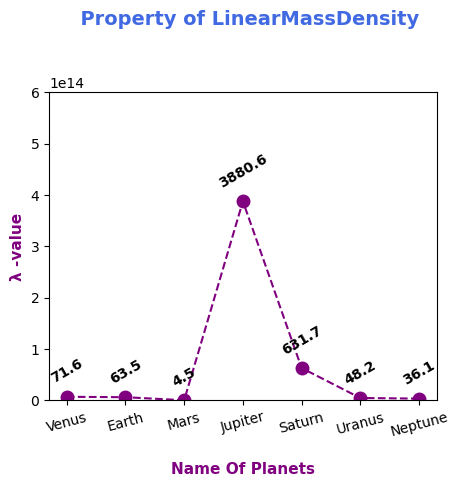

In [51]:
    plt.figure(figsize=(5,4))
    plt.style.use('default')
    plt.title("  Property of LinearMassDensity\n\n",color='royalblue',fontsize=14,weight='bold')
    plt.xlabel("\nName Of Planets",color='purple', fontsize=11,weight='bold')
    plt.ylabel("\u03bb -value",color='purple', fontsize=11,weight='bold')
    df_temp=df2.drop(index=0)  # Excluding the planet Mercury.
    plt.plot(df_temp.Planet_name,df_temp['Li'],'o--',color='purple',ms=9)#shows that LinearMassDensity reaches at its pick value for Jupiter
    plt.xticks(rotation=15)
    plt.ylim([0.0,0.6*10e14])
    x=df_temp.Planet_name
    y=df_temp['Li']
    l=len(df_temp.Planet_name)
    for i in range(l):
        value_txt=y[i+1]
        plt.annotate(f'{value_txt/100000000000:.1f}', (x[i+1], y[i+1]), textcoords="offset points", xytext=(0,10), ha='center',rotation=30,weight='bold')
    plt.savefig(base_dir+'LinearMassDensity.jpg')
    plt.show()

# **Visualize the Forces of each planet acts on Mercury(Plotted using force_a1_list, i.e fetching DataFrame column as Y-axis) ** #

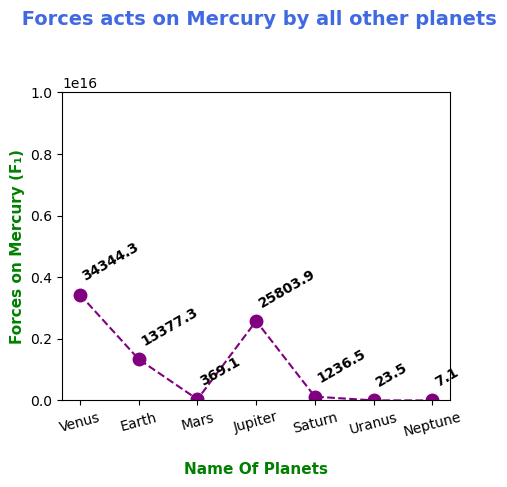

In [52]:
plt.figure(figsize=(5,4))
plt.style.use('default')
plt.title(" Forces acts on Mercury by all other planets\n\n",color='royalblue',fontsize=14,weight='bold')
plt.xlabel("\nName Of Planets",color='green', fontsize=11,weight='bold')
plt.ylabel("Forces on Mercury (F\u2081)",color='green', fontsize=11,weight='bold')
df_temp=df2.drop(index=0)   # Excluding the planet Mercury.
plt.plot(df_temp.Planet_name,df_temp['F_P(Newton)'],'o--',color='purple',ms=9)#shows that LinearMassDensity reaches at its pick value 
#plt.scatter(df_temp['Planet_name'], force_a1_list1, color='purple')
plt.xticks(rotation=15)
plt.ylim([0.0,10e15])
x=df_temp.Planet_name
y=df_temp['F_P(Newton)']
l=len(df_temp.Planet_name)
for i in range(l):
    value_txt=y[i+1]
    plt.annotate(f'{value_txt/100000000000:.1f}', (x[i+1], y[i+1]), textcoords="offset points", xytext=(0,10), ha='left',rotation=30,weight='bold')
plt.savefig(base_dir+'PurterbingForce_a.jpg')
plt.show()

# **Visualize the Forces of each planet acts on Mercury** (Plotted using force_a1_list1 i.e taking 'list' as Y-axis and 'scatter' plot)#

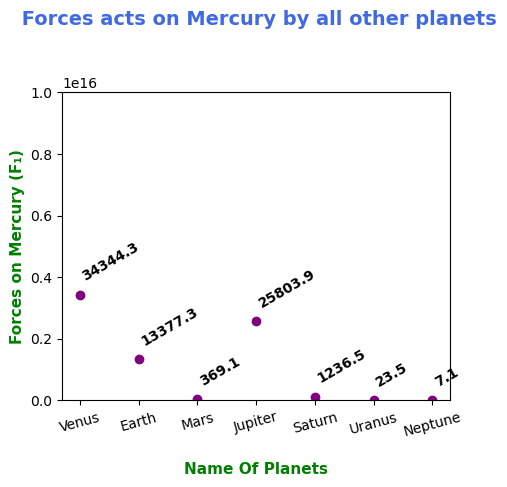

In [53]:
plt.figure(figsize=(5,4))
plt.style.use('default')
plt.title(" Forces acts on Mercury by all other planets\n\n",color='royalblue',fontsize=14,weight='bold')
plt.xlabel("\nName Of Planets",color='green', fontsize=11,weight='bold')
plt.ylabel("Forces on Mercury (F\u2081)",color='green', fontsize=11,weight='bold')
df_temp=df2.drop(index=0)   # Excluding the planet Mercury.
plt.scatter(df_temp['Planet_name'], force_a1_list1, color='purple')
plt.xticks(rotation=15)
plt.ylim([0.0,10e15])
x=df_temp['Planet_name']
y=force_a1_list1
l=len(df_temp.Planet_name)
for i in range(l):
    value_txt=y[i]
    plt.annotate(f'{value_txt/100000000000:.1f}', (x[i+1], y[i]), textcoords="offset points", xytext=(0,10), ha='left',rotation=30,weight='bold')
plt.savefig(base_dir+'PurterbingForce_b.jpg')
plt.show()

# **Writing results onto a Text file** #

In [54]:
f = open(base_dir+"Results.txt","w") # For newly created Text file.
f.write(f"\nThe Mass of Sun is := {Median_Sun_mass:.4e} Kg")
f.close()

f = open(base_dir+"Results.txt", "a") # For already opened Text file.
f.write(f"\nForce(due to Sun)= {force_a0:.3f} Newton")
f.write(f"\nTotal Force(due to Other Planets)= {force_a1:.3f} Newton")
f.write(f"\nApisidal Angle (Calculated)= {apsidal_angle} Radian")
f.write(f"\nPrecession Rate (Newtonian) = {Precession_Rate:.2f} arcsec/century")
f.write(f"\nPrecession Rate (GR correction) = {myst_Precession_Rate:.2f} arcsec/century")
f.close()
print(f"\nForce(due to Sun)= {force_a0:.3f} Newton")
print(f"\nTotal Force(due to Other Planets)= {force_a1:.3f} Newton")
print(f"\nApisidal Angle (Calculated)= {apsidal_angle} Radian")
print(f"\nPrecession Rate (Newtonian) = {Precession_Rate:.2f} arcsec/century")
print(f"\nPrecession Rate (GR correction) = {myst_Precession_Rate:.2f} arcsec/century")


Force(due to Sun)= -13086591912627350274048.000 Newton

Total Force(due to Other Planets)= 7516174537648876.000 Newton

Apisidal Angle (Calculated)= 3.141595751619944 Radian

Precession Rate (Newtonian) = 530.63 arcsec/century

Precession Rate (GR correction) = 42.97 arcsec/century


# **Writing the calculated information into an Excel workbook.** #

In [55]:
with pd.ExcelWriter(base_dir+'Force_Calculation.xlsx') as writer:   # Opening new workbook.
            df2.to_excel(writer,index=False) # Modified df2.
display(df2)

with pd.ExcelWriter(base_dir+'Results.xlsx') as writer:   # Opening new workbook.
#            df2.to_excel(writer,index=False) # Modified df2.
#            df2.to_excel(writer,sheet_name="Perturbing_Force_Planet_Data",index=False) # Modified df2.
            force_precession_list=[{'Force(due to Sun)':['{:.3e}'.format(force_a0),'Newton'],\
                                'Total Force(due to OtherPlanets)':["{:.3e}".format(force_a1),"Newton"],\
                                'Apsidal Angle':["{:.5f}".format(apsidal_angle),"Radian"],\
                                'Precession Rate(Newtonian)':["{:.1f}".format(Precession_Rate),"arcsec/century"],\
                                'Precession Rate(GR correction)':[f"{myst_Precession_Rate:.2f} arcsec/century"]}]
            df3=pd.DataFrame(force_precession_list)
            df3.to_excel(writer,sheet_name="Results", index=False)
display(df3)

print("\nYou have successfully uploaded the information in the Excel file.\n\nPlease Do Check....\n\nThank You....")

,Sl_no.,Planet_name,Planet_mass(in 10^24 Kg),Orbital_radius(in 10^6 Km),Time_period(in Earth days),Li,L*a/(R^2-a^2),S_a,F_P(Newton)
0,1,Mercury,0.33011,57.9,87.969,...,...,...,...
1,2,Venus,4.86750,108.2,224.701,7159766039739.375,49.61806,89.436962,3434425137618532.0
2,3,Earth,5.97000,149.6,365.240,6351303544509.458984,19.326535,26.136638,1337729403970535.75
3,4,Mars,0.64171,228.0,686.565,447944379524.123535,0.533315,0.606843,36914625210643.242188
4,5,Jupiter,1898.19000,778.5,4328.900,388062069913429.5,37.27962,37.694336,2580392402932437.0
5,6,Saturn,568.34000,1432.0,10752.900,63166285165396.507812,1.78644,1.792291,123652447661892.921875
6,7,Uranus,86.81300,2867.0,30667.300,4819224999873.286133,0.033961,0.033988,2350670848576.813477
7,8,Neptune,102.41300,4515.0,60152.000,3610085312706.594727,0.010255,0.010259,709849406257.464722


,Force(due to Sun),Total Force(due to OtherPlanets),Apsidal Angle,Precession Rate(Newtonian),Precession Rate(GR correction)
0,"[-1.309e+22, Newton]","[7.516e+15, Newton]","[3.14160, Radian]","[530.6, arcsec/century]",[42.97 arcsec/century]



You have successfully uploaded the information in the Excel file.

Please Do Check....

Thank You....
